# IMPORTING ALL PACKAGES

In [2]:
import pandas as pd
% matplotlib inline

# IMPORT FILE, CHECK HEAD, CHECK FOR NULLS

In [3]:
mass_shootings = pd.read_csv('D:/MS/USF/fall 2018/us-mass-shootings-last-50-years/shooting.csv',encoding='latin1')

In [4]:
mass_shootings.head()

,event,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10-01-2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",06-07-2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",06-05-2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",05-12-2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [12]:
mass_shootings.isnull().sum()

event                    0
Title                    0
Location                45
Date                     0
Summary                  1
Fatalities               0
Injured                  0
Total victims            0
Mental Health Issues     0
Race                     2
Gender                   0
Latitude                17
Longitude               17
dtype: int64

In [13]:
mass_shootings[mass_shootings['Summary'].isnull()]

,event,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10-01-2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132


# EXTRACT YEAR AND MONTH. SAVING THIS CSV.

In [14]:
mass_shootings.Date = pd.to_datetime(mass_shootings.Date)

In [15]:
mass_shootings['year'] = mass_shootings.Date.dt.year

In [16]:
mass_shootings['month'] = mass_shootings.Date.dt.month

In [17]:
mass_shootings['week'] = mass_shootings.Date.dt.week

In [18]:
mass_shootings['day'] = mass_shootings.Date.dt.weekday_name

In [19]:
#df['weekday'] = df[['datetime']].apply(lambda x: dt.datetime.strftime(x['datetime'], '%A')

In [20]:
mass_shootings.tail()

,event,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude,year,month,week,day
315,316,Clara Barton Elementary School,"Chicago, Illinois",1974-01-17,"On January 17, 1974, a 14-year-old student ent...",1,3,4,Yes,Unknown,Male,41.839280,-87.688181,1974,1,3,Thursday
316,317,New Orleans Police Shootings,"New Orleans, Louisiana",1972-12-31,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,13,22,Yes,Black American or African American,Male,30.068724,-89.931474,1972,12,52,Sunday
317,318,St. Aloysius Church,"Spokane, Washington",1971-11-11,"On November 11, 1971, a former MIT student ent...",2,4,5,Yes,White American or European American,Male,47.673674,-117.415984,1971,11,45,Thursday
318,319,Rose-Mar College of Beauty,"Mesa, Arizona",1966-11-12,"On November 12, 1966, an 18-year-old high scho...",5,1,6,Yes,White American or European American,Male,33.422687,-111.816320,1966,11,45,Saturday
319,320,University of Texas at Austin,"Austin, Texas",1966-08-01,"On August 1, 1966, a 25-year-old engineering s...",17,32,48,Yes,White American or European American,Male,30.198887,-97.844159,1966,8,31,Monday


In [21]:
mass_shootings.to_csv('D:/MS/USF/fall 2018/us-mass-shootings-last-50-years/mass_shootings.csv')

# YEARWISE FATALITY CHECK

In [22]:
yearwise = mass_shootings.groupby('year')[['Fatalities']].sum()

In [23]:
#counts number of rows for every year entry
#mass_shootings.groupby('year')[['Fatalities']].count()

In [24]:
type(yearwise)

pandas.core.frame.DataFrame

In [25]:
yearwise

,Fatalities
year,
1966,22
1971,2
1972,10
1974,4
1976,8
1979,4
1982,10
1983,14
1984,31


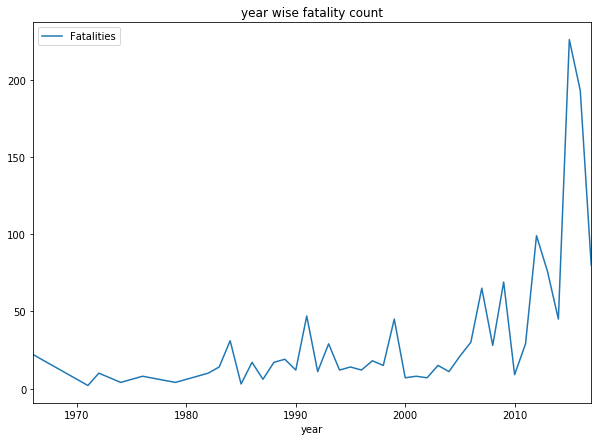

In [26]:
yearwise.plot(kind='line',title='year wise fatality count',figsize=(10,7))

## MONTH WISE FATALITY CHECK

In [27]:
monthwise = mass_shootings.month.value_counts().sort_index()

In [28]:
monthwise

1     28
2     53
3     42
4     34
5     19
6     18
7     16
8     22
9     16
10    23
11    20
12    29
Name: month, dtype: int64

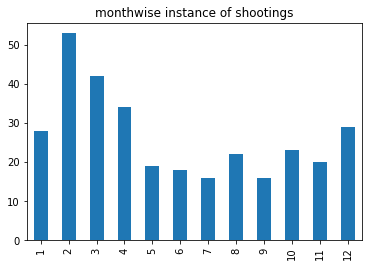

In [29]:
monthwise.plot(kind='bar',title= 'monthwise instance of shootings')

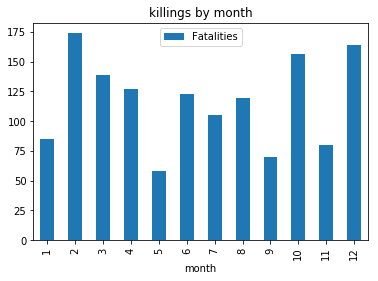

In [31]:
monthwise_fatalities = mass_shootings.groupby('month')[['Fatalities']].sum()
monthwise_fatalities.plot(kind='bar',title='killings by month')

In [32]:
monthwise_fatalities['pmf']=monthwise_fatalities['Fatalities']/sum(monthwise_fatalities['Fatalities'])

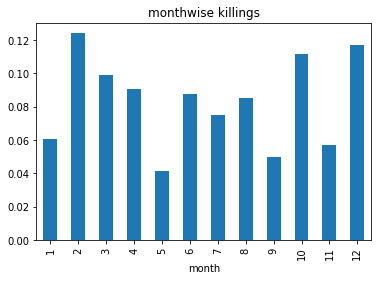

In [33]:
monthwise_fatalities['pmf'].plot(kind='bar',title  = 'monthwise killings')

# WEEK WISE ANALYSIS

In [34]:
weekwise = mass_shootings.groupby('week')[['Fatalities']].sum()

weekwise

,Fatalities
week,
1,18
2,5
3,20
4,27
5,36
6,28
7,55
8,54
9,20


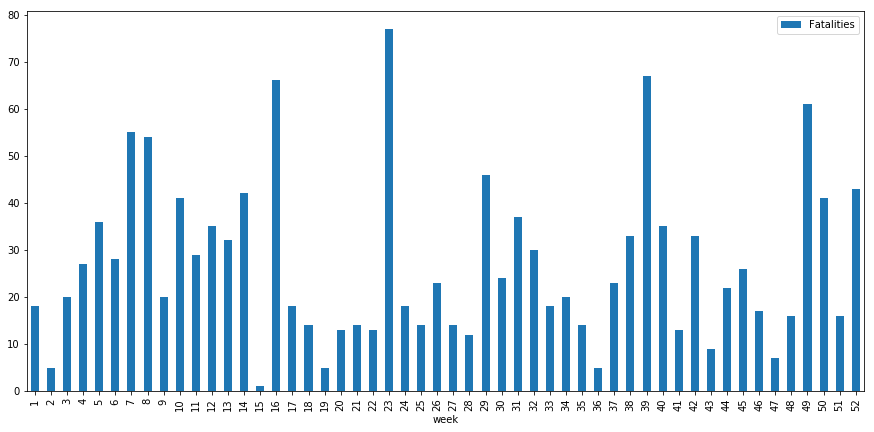

In [35]:
weekwise.plot(kind='bar',figsize=(15,7))


#weekwise['week'] = weekwise.index

weekwise.reset_index(level=0,inplace=True)
weekwise

test = weekwise.filter(['week','Fatalities'],axis=1)

test.groupby('week')['Fatalities'].sum().hist(cumulative=True, normed=1, bins=100)

# DAY WISE ANALYSIS

In [36]:
daywise=mass_shootings.groupby('day')[['Fatalities']].sum()

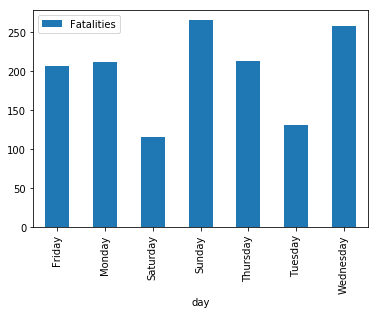

In [37]:
daywise.plot(kind='bar')

## SEX WISE ANALYSIS

In [38]:
mass_shootings.Gender.value_counts()

Male           272
Unknown         21
M               17
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

In [39]:
mass_shootings.Gender[mass_shootings.Gender=='M'] = 'Male'

C:\Users\tejbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
mass_shootings.Gender.value_counts()

Male           289
Unknown         21
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

In [41]:
mass_shootings.head()

,event,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude,year,month,week,day
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,NaN,58,527,585,Unclear,White,Male,36.181271,-115.134132,2017,10,39,Sunday
1,2,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,Male,NaN,NaN,2017,6,24,Wednesday
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",2017-06-07,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,Male,NaN,NaN,2017,6,23,Wednesday
3,4,Florida awning manufacturer shooting,"Orlando, Florida",2017-06-05,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,Male,NaN,NaN,2017,6,23,Monday
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",2017-05-12,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,Male,NaN,NaN,2017,5,19,Friday


In [42]:
mass_shootings.Gender[mass_shootings.Gender=='M/F'] = 'Male/Female'

C:\Users\tejbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
test = mass_shootings.Gender.value_counts()

In [44]:
test

Male           289
Unknown         21
Male/Female      5
Female           5
Name: Gender, dtype: int64

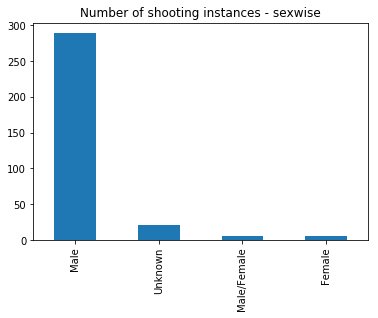

In [45]:
test.plot(kind='bar',title= 'Number of shooting instances - sexwise')

In [46]:
sexwisefatalities = mass_shootings.groupby('Gender')[['Fatalities']].sum()

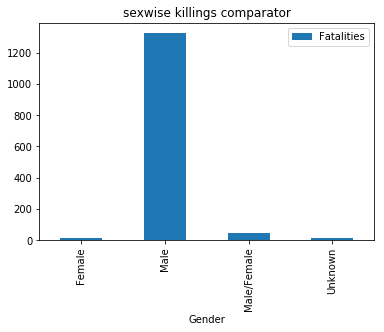

In [47]:
sexwisefatalities.plot(kind = 'bar', title = 'sexwise killings comparator')

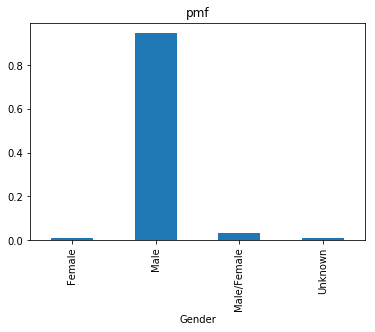

In [48]:
sexwisefatalities['pmf'] = (sexwisefatalities.Fatalities) / sum(sexwisefatalities.Fatalities)
sexwisefatalities['pmf'].plot(kind='bar',title='pmf')

## RACEWISE ANALYSIS 

In [49]:
mass_shootings.Race.value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    7
Asian                                                    6
Latino                                                   5
Black                                                    4
black                                                    3
Native American or Alaska Native                         3
Other                                                    2
Two or more races                                        2
Asian American/Some other race                           1
Black American or African American/Unknown               1
White American or European American/Some other Race     

In [50]:
mass_shootings.Race[mass_shootings.Race == 'White American or European American']= 'White'
mass_shootings.Race[mass_shootings.Race == 'white']= 'White'
#mass_shootings.Race[mass_shootings.Race == 'white']= 'White'
mass_shootings.Race[mass_shootings.Race == 'Native American or Alaska Native']= 'White'
mass_shootings.Race[mass_shootings.Race == 'White American or European American/Some other Race']= 'White'



mass_shootings.Race[mass_shootings.Race == 'Black American or African American']= 'Black'
mass_shootings.Race[mass_shootings.Race == 'black']= 'Black'
mass_shootings.Race[mass_shootings.Race == 'Black American or African American/Unknown']= 'Black'


mass_shootings.Race[mass_shootings.Race == 'Asian American/Some other race']= 'Asian'
mass_shootings.Race[mass_shootings.Race == 'Asian American']= 'Asian'


mass_shootings.Race[mass_shootings.Race == 'Some other race']= 'Unknown'
mass_shootings.Race[mass_shootings.Race == 'Other']= 'Unknown'



C:\Users\tejbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tejbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tejbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tejbir\Anaconda3\lib\site-packages\ipykernel_laun

In [51]:
racewise = mass_shootings.Race.value_counts()
racewise

White                145
Black                 84
Unknown               64
Asian                 18
Latino                 5
Two or more races      2
Name: Race, dtype: int64

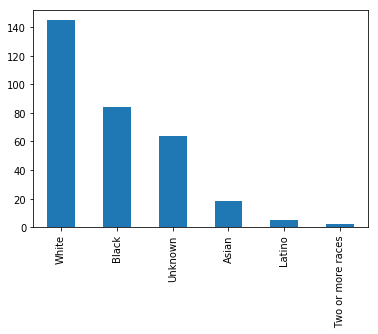

In [52]:
racewise.plot(kind='bar')

In [53]:
racewisekillings = mass_shootings.groupby('Race')[['Fatalities']].sum()

In [54]:
racewisekillings

,Fatalities
Race,
Asian,138
Black,229
Latino,23
Two or more races,11
Unknown,197
White,792


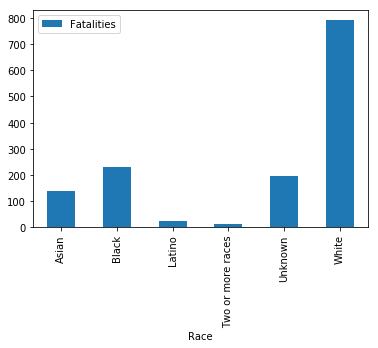

In [55]:
racewisekillings.plot(kind='bar')

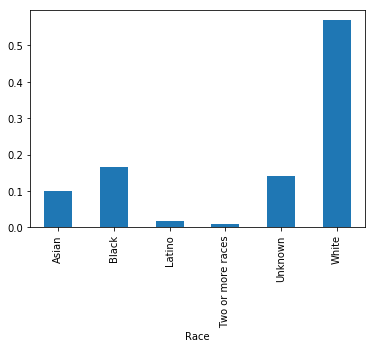

In [56]:
racewisekillings['pmf'] = racewisekillings['Fatalities']/sum(racewisekillings['Fatalities'])
racewisekillings['pmf'].plot(kind='bar')

In [406]:
#racewisekillings.reset_index(inplace=True)

# MENTAL HEALTH ANALYSIS

## LETS CONSIDER KNOWN CASES ONLY (I.E YES, NO OR UNCLEAR)

In [57]:
mass_shootings['Mental Health Issues'].value_counts()

Unknown    110
Yes        106
No          90
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

In [58]:
mental_health = (mass_shootings['Mental Health Issues'] == 'Yes') | (mass_shootings['Mental Health Issues'] == 'No') | (mass_shootings['Mental Health Issues'] == 'Unclear')

In [59]:
known_mass_shootings = mass_shootings[mental_health]

In [60]:
mentalcounts = known_mass_shootings['Mental Health Issues'].value_counts()
mentalcounts

Yes        106
No          90
Unclear     13
Name: Mental Health Issues, dtype: int64

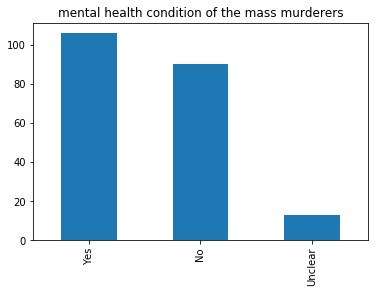

In [61]:
mentalcounts.plot(kind='bar',title='mental health condition of the mass murderers')

In [62]:
fatalities_MH = known_mass_shootings.groupby('Mental Health Issues')[['Fatalities']].sum()

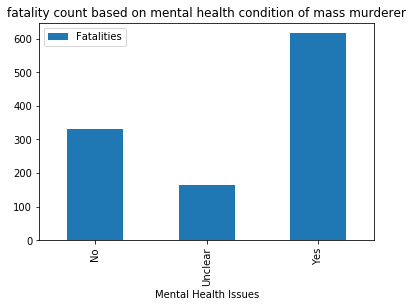

In [63]:
fatalities_MH.plot(kind='bar',title='fatality count based on mental health condition of mass murderer')

# TESTING CORRELATIONS

In [72]:
correlation = mass_shootings.filter(['Race','Mental Health Issues','Gender'])
correlation.head()
correlation=pd.get_dummies(correlation)

In [73]:
correlation

,Race_Asian,Race_Black,Race_Latino,Race_Two or more races,Race_Unknown,Race_White,Mental Health Issues_No,Mental Health Issues_Unclear,Mental Health Issues_Unknown,Mental Health Issues_Yes,Mental Health Issues_unknown,Gender_Female,Gender_Male,Gender_Male/Female,Gender_Unknown
0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
9,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [74]:
test=correlation.corr()

In [75]:

import numpy as np
condition = (test > 0.20) | (test < -0.20)
condition
test[condition]

,Race_Asian,Race_Black,Race_Latino,Race_Two or more races,Race_Unknown,Race_White,Mental Health Issues_No,Mental Health Issues_Unclear,Mental Health Issues_Unknown,Mental Health Issues_Yes,Mental Health Issues_unknown,Gender_Female,Gender_Male,Gender_Male/Female,Gender_Unknown
Race_Asian,1.000000,NaN,NaN,NaN,NaN,-0.222227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_Black,NaN,1.000000,NaN,NaN,-0.298300,-0.543061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_Latino,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.229344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_Two or more races,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_Unknown,NaN,-0.298300,NaN,NaN,1.000000,-0.455129,NaN,NaN,0.361873,-0.235705,NaN,NaN,-0.417318,NaN,0.530034
Race_White,-0.222227,-0.543061,NaN,NaN,-0.455129,1.000000,NaN,NaN,-0.315149,0.319693,NaN,NaN,NaN,NaN,-0.241234
Mental Health Issues_No,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-0.452735,-0.440254,NaN,NaN,NaN,NaN,NaN
Mental Health Issues_Unclear,NaN,NaN,0.229344,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mental Health Issues_Unknown,NaN,NaN,NaN,NaN,0.361873,-0.315149,-0.452735,NaN,1.000000,-0.509369,NaN,NaN,-0.252331,NaN,0.366174
Mental Health Issues_Yes,NaN,NaN,NaN,NaN,-0.235705,0.319693,-0.440254,NaN,-0.509369,1.000000,NaN,NaN,NaN,NaN,NaN


In [79]:
correlation = mass_shootings.filter(['Race','Gender'])
correlation.head()
correlation=pd.get_dummies(correlation)
test=correlation.corr()

import numpy as np
condition = (test > 0.15) | (test < -0.15)
condition
test[condition]

,Race_Asian,Race_Black,Race_Latino,Race_Two or more races,Race_Unknown,Race_White,Gender_Female,Gender_Male,Gender_Male/Female,Gender_Unknown
Race_Asian,1.000000,NaN,NaN,NaN,NaN,-0.222227,NaN,NaN,NaN,NaN
Race_Black,NaN,1.000000,NaN,NaN,-0.298300,-0.543061,NaN,0.195396,NaN,-0.158109
Race_Latino,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_Two or more races,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Race_Unknown,NaN,-0.298300,NaN,NaN,1.000000,-0.455129,NaN,-0.417318,NaN,0.530034
Race_White,-0.222227,-0.543061,NaN,NaN,-0.455129,1.000000,NaN,NaN,NaN,-0.241234
Gender_Female,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.384678,NaN,NaN
Gender_Male,NaN,0.195396,NaN,NaN,-0.417318,NaN,-0.384678,1.000000,-0.384678,-0.809174
Gender_Male/Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.384678,1.000000,NaN
Gender_Unknown,NaN,-0.158109,NaN,NaN,0.530034,-0.241234,NaN,-0.809174,NaN,1.000000


In [80]:
correlation = mass_shootings.filter(['Mental Health Issues','Gender'])
correlation.head()
correlation=pd.get_dummies(correlation)
test=correlation.corr()

import numpy as np
condition = (test > 0.15) | (test < -0.15)
condition
test[condition]

,Mental Health Issues_No,Mental Health Issues_Unclear,Mental Health Issues_Unknown,Mental Health Issues_Yes,Mental Health Issues_unknown,Gender_Female,Gender_Male,Gender_Male/Female,Gender_Unknown
Mental Health Issues_No,1.000000,NaN,-0.452735,-0.440254,NaN,NaN,NaN,NaN,-0.165780
Mental Health Issues_Unclear,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mental Health Issues_Unknown,-0.452735,NaN,1.000000,-0.509369,NaN,NaN,-0.252331,NaN,0.366174
Mental Health Issues_Yes,-0.440254,NaN,-0.509369,1.000000,NaN,NaN,0.163162,NaN,-0.186518
Mental Health Issues_unknown,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Gender_Female,NaN,NaN,NaN,NaN,NaN,1.000000,-0.384678,NaN,NaN
Gender_Male,NaN,NaN,-0.252331,0.163162,NaN,-0.384678,1.000000,-0.384678,-0.809174
Gender_Male/Female,NaN,NaN,NaN,NaN,NaN,NaN,-0.384678,1.000000,NaN
Gender_Unknown,-0.165780,NaN,0.366174,-0.186518,NaN,NaN,-0.809174,NaN,1.000000


In [81]:
correlation = mass_shootings.filter(['Mental Health Issues','Race'])
correlation.head()
correlation=pd.get_dummies(correlation)
test=correlation.corr()

import numpy as np
condition = (test > 0.15) | (test < -0.15)
condition
test[condition]

,Mental Health Issues_No,Mental Health Issues_Unclear,Mental Health Issues_Unknown,Mental Health Issues_Yes,Mental Health Issues_unknown,Race_Asian,Race_Black,Race_Latino,Race_Two or more races,Race_Unknown,Race_White
Mental Health Issues_No,1.000000,NaN,-0.452735,-0.440254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mental Health Issues_Unclear,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.229344,NaN,NaN,NaN
Mental Health Issues_Unknown,-0.452735,NaN,1.000000,-0.509369,NaN,NaN,NaN,NaN,NaN,0.361873,-0.315149
Mental Health Issues_Yes,-0.440254,NaN,-0.509369,1.000000,NaN,NaN,-0.163351,NaN,NaN,-0.235705,0.319693
Mental Health Issues_unknown,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Race_Asian,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.222227
Race_Black,NaN,NaN,NaN,-0.163351,NaN,NaN,1.000000,NaN,NaN,-0.298300,-0.543061
Race_Latino,NaN,0.229344,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Race_Two or more races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Race_Unknown,NaN,NaN,0.361873,-0.235705,NaN,NaN,-0.298300,NaN,NaN,1.000000,-0.455129


In [539]:
from pygeocoder import Geocoder
rresults = Geocoder.reverse_geocode(mass_shootings['Latitude'][50], mass_shootings['Longitude'][50])

In [540]:
rresults.city

'Belfair'

In [528]:
mass_shootings['Latitude']= mass_shootings['Latitude'].astype(float)
mass_shootings['Longitude']= mass_shootings['Longitude'].astype(float)

# Learnings
• There is a timeline on the tableau dashboard (https://us-east-1.online.tableau.com/t/tejbirsworkspace/views/USMassshootings/Finaldashboard?:embed=y&:showAppBanner=false&:showShareOptions=true&:display_count=no&:showVizHome=no#3) that gives us the number of injured and killed people over the years. 
It is clearly seen that from 2010 onwards, there is a significant rise in the number of people affected by these activities. The deadliest years have been 2015 with 226 and 2014 with 193 reported dead people.

• Visualized mass shootings on US map-
https://us-east-1.online.tableau.com/#/site/tejbirsworkspace/views/USMassshootings/Locationwisefatalities?:iid=10

From the map we can see that the states on east coast generally seem to be more affected by such attacks

• For the known values of gender and race, there is no real correlation. The  most interesting correlation coefficient is 0.19 for gender = male and race = black

• For the known values of gender and mental health issues, the  most interesting correlation coefficient is 0.16 for gender = male and mental health issues = yes

• For the known values of race and mental health issues, the  most interesting correlation coefficient is 0.31 for race = white and mental health issues = yes

•The deadliest day is Sunday which is closely followed by Wednesday. 250+ people lost their lives on each of these days.
 The deadliest week is 23 with close to 80 killings being reported. This is closely followed by week 16 and 39 which reported 70  killings.
The deadliest month is February with close to 175 reported dead in more than 50 different shootings. October and December also account for more than 150 killings each that take up 3rd and 2nd ranking in deadly months list.

• Of the known shooter mental conditions, more than 100 shooters had some mental health issue with them. These people ended up taking more than 600 lives. Most eye catching relevation has been the corelation of shooters with race = white and mental illness = yes with a coefficient of ~0.32

• More than 140 shooters have belonged to the white race.They killed almost 800 people (> 50% of total killings).

• Men have been involved in more than 90% of the total killings recorded killing more than 1200 people in the process.


